In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette()

# $H_2$


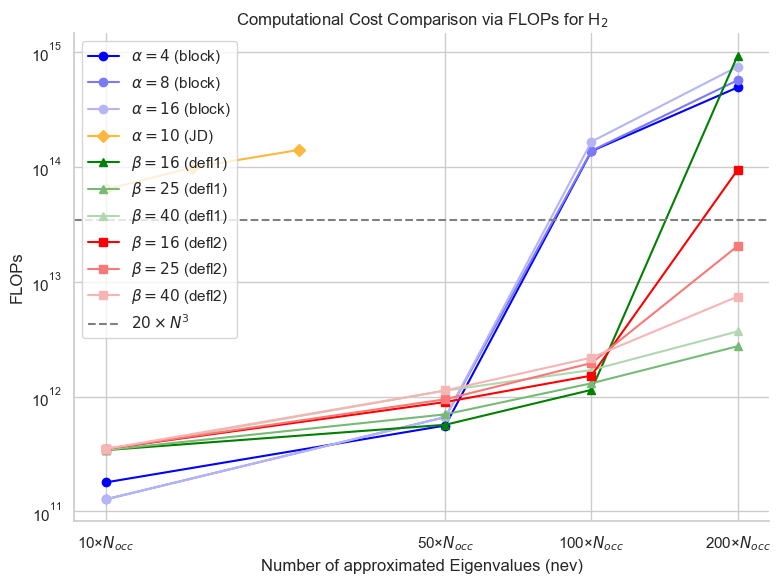

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
N_occ =1
N = np.array([10, 50, 100, 200])
N_JD = np.array([10, 15, 25])

# block davidson
FLOPS_16 = np.array([179213353460, 559665999700, 136669627038200, 489683441833200])
FLOPS_25 = np.array([127689696180, 662860224900, 137527449849000, 565044490819600])
FLOPS_40 = np.array([127689696180, 662860224900, 165188018613800, 742031089239600])

# JD
FLOPS_10_JD = [63312098850630, 98032487542710, 140025476232930]

# deflation algorithm (sorting of Eigenvalues)
FLOPS_16_def = np.array([342211375416, 568173067348, 1143580058914, 926976472646686])
FLOPS_25_def = np.array([342211375416, 700038639548, 1304401939782, 2738683449200])
FLOPS_40_def = np.array([342211375416, 1126472236804, 1702282147472, 3686170035402])

# deflation algorithm (keep running until convergence)
FLOPS_16_def1 = np.array([350655912760, 895997128488, 1520739847862, 93736255643800])
FLOPS_25_def1 = np.array([350655912760, 946787529752, 1955403718740, 20404958525795])
FLOPS_40_def1 = np.array([350655912760, 1129212037300, 2180921001662, 7409273765454])

# Exact diagonalization flops
Grenze = 20*(11994)**3

# Generate color shades for each method
blue_shades = sns.light_palette("blue", n_colors=5, reverse=True)
green_shades = sns.light_palette("green", n_colors=5, reverse=True)
red_shades = sns.light_palette("red", n_colors=5, reverse=True)
orange_shades = sns.light_palette("orange", n_colors=5, reverse=True)

plt.figure(figsize=(8,6))

# Standard Davidson (circles)
plt.plot(N, FLOPS_16, label=r'$\alpha = 4$ (block)', marker='o', color=blue_shades[0])
plt.plot(N, FLOPS_25, label=r'$\alpha = 8$ (block)', marker='o', color=blue_shades[2])
plt.plot(N, FLOPS_40, label=r'$\alpha = 16$ (block)', marker='o', color=blue_shades[3])

# Jacobi-Davidson (diamonds)
plt.plot(N_JD, FLOPS_10_JD, label=r'$\alpha = 10$ (JD)', marker='D', color=orange_shades[1])

# Deflation with ordering(triangles)
plt.plot(N, FLOPS_16_def, label=r'$\beta = 16$ (defl1)', marker='^', color=green_shades[0])
plt.plot(N, FLOPS_25_def, label=r'$\beta = 25$ (defl1)', marker='^', color=green_shades[2])
plt.plot(N, FLOPS_40_def, label=r'$\beta = 40$ (defl1)', marker='^', color=green_shades[3])

# Deflation until convergence (squares)
plt.plot(N, FLOPS_16_def1, label=r'$\beta = 16$ (defl2)', marker='s', color=red_shades[0])
plt.plot(N, FLOPS_25_def1, label=r'$\beta = 25$ (defl2)', marker='s', color=red_shades[2])
plt.plot(N, FLOPS_40_def1, label=r'$\beta = 40$ (defl2)', marker='s', color=red_shades[3])

# Reference line
plt.axhline(Grenze, color='gray', linestyle='--', label=r'$20 \times N^3$')

plt.title(r'Computational Cost Comparison via FLOPs for H$_{2}$')
plt.xscale('log')
plt.yscale('log')

xticks = np.array([10, 50, 100, 200]) * N_occ
# Create labels: one line for nev, second line for multiplier
xtick_labels = [f"{mult}×$N_{{occ}}$" for nev, mult in zip(xticks, [10, 50, 100, 200])]
plt.xticks(xticks, xtick_labels)
plt.xlabel('Number of approximated Eigenvalues (nev)')
plt.ylabel('FLOPs')
plt.legend()
sns.despine()
plt.tight_layout()
plt.savefig('flops_comparison_H2.png', dpi=300)
plt.show()

# $CH_2O$

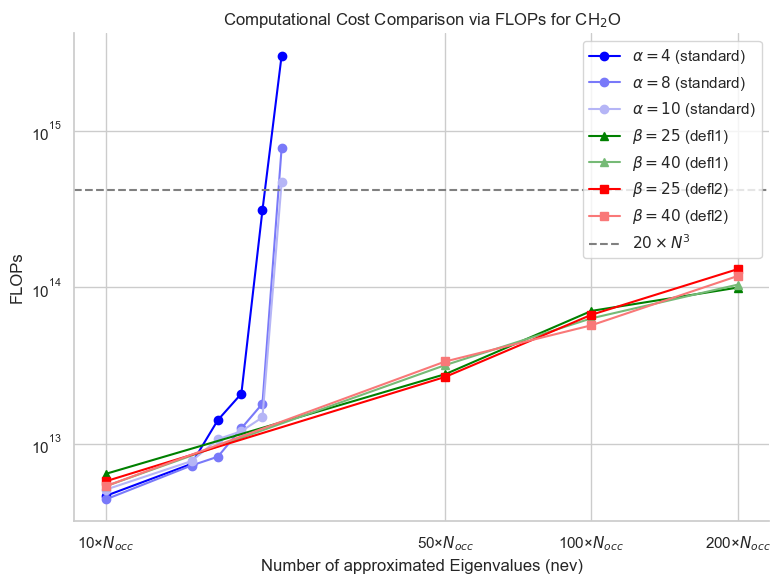

In [5]:
N = np.array([10, 50, 100, 200]) *6
N_occ =6
N_block = np.array([10, 15, 17, 19, 21, 23]) *6
N_JD = np.array([10, 15, 25]) *6

# Block Davidson (circles)
FLOPS_4 = np.array([4640589149100, 7421795065530, 14166167468682, 20869785341010, 311908520004600, 3041267507394030])
FLOPS_8 = np.array([4405801238340, 7247024095410, 8251693168158, 12535766414262, 18027893195046, 779828189847582])
FLOPS_10 = np.array([5082833501100, 7732455154650, 10671336177942, 12007060296594, 14738465704914, 470107469051082])

FLOPS_10_JD = [87990253127280, 131826844848090, 191366081488050]


# Deflation with ordering(triangles)
FLOPS_25_def = np.array([6415065628956, 27845261539523, 70674758645938, 99597905113222])
FLOPS_40_def = np.array([5349292935528, 31816496438039,63363168555916, 104014172291569])

# Mixed JD and Davidson (diamonds)
# FLOPS_16_JD = np.array([4201528375541, 104266141454671, 41070075286370, 86625043818120])
# FLOPS_25_JD = np.array([3541251633876,  176523547168970,  151131919263263,   74279594974926])
# FLOPS_32_JD = np.array([4200266880486,  195047635448971,  244404140181504,   71012630660365])

# Deflation until convergence (squares)
FLOPS_25_def1 = np.array([5751718005519, 26744518761011, 66777753371722, 130693032030320])
FLOPS_40_def1 = np.array([5349292935528, 33555518567601, 57195133086388, 118109819702851])

Grenze = 20*(27643)**3

plt.figure(figsize=(8,6))
# Standard Davidson (circles)
plt.plot(N_block, FLOPS_4, label=r'$\alpha = 4$ (standard)', marker='o', color=blue_shades[0])
plt.plot(N_block, FLOPS_8, label=r'$\alpha = 8$ (standard)', marker='o', color=blue_shades[2])
plt.plot(N_block, FLOPS_10, label=r'$\alpha = 10$ (standard)', marker='o', color=blue_shades[3])

# Jacobi-Davidson (diamonds)
# plt.plot(N_JD, FLOPS_10_JD, label=r'$\alpha = 10$ (JD)', marker='D', color=orange_shades[1])

# Deflation (triangles)
# plt.plot(N, FLOPS_16_def, label=r'$\alpha = 16$ (defl1)', marker='^', color=green_shades[0])
plt.plot(N, FLOPS_25_def, label=r'$\beta = 25$ (defl1)', marker='^', color=green_shades[0])
plt.plot(N, FLOPS_40_def, label=r'$\beta = 40$ (defl1)', marker='^', color=green_shades[2])

# Deflation until convergence (squares)
# plt.plot(N, FLOPS_16_def1, label=r'$\alpha = 16$ (defl2)', marker='s', color=red_shades[0])
plt.plot(N, FLOPS_25_def1, label=r'$\beta = 25 $ (defl2)', marker='s', color=red_shades[0])
plt.plot(N, FLOPS_40_def1, label=r'$\beta = 40$ (defl2)', marker='s', color=red_shades[2])

# plt.plot(N, FLOPS_16_JD, label=r'$\beta = 16$ (JD)', marker='D', color=orange_shades[0])
# plt.plot(N, FLOPS_25_JD, label=r'$\beta = 25$ (JD)', marker='D', color=orange_shades[2])
# plt.plot(N, FLOPS_32_JD, label=r'$\beta = 32$ (JD)', marker='D', color=orange_shades[3])

# Reference line
plt.axhline(Grenze, color='gray', linestyle='--', label=r'$20 \times N^3$')

plt.title(r'Computational Cost Comparison via FLOPs for CH$_{2}$O')
plt.xscale('log')
plt.yscale('log')

xticks = np.array([10, 50, 100, 200]) * N_occ
# Create labels: one line for nev, second line for multiplier
xtick_labels = [f"{mult}×$N_{{occ}}$" for nev, mult in zip(xticks, [10, 50, 100, 200])]
plt.xticks(xticks, xtick_labels)
plt.xlabel('Number of approximated Eigenvalues (nev)')
plt.ylabel('FLOPs')
plt.legend()
sns.despine()
plt.tight_layout()
plt.savefig('flops_comparison_CH2O_block.png', dpi=300)
plt.show()

# Uracil


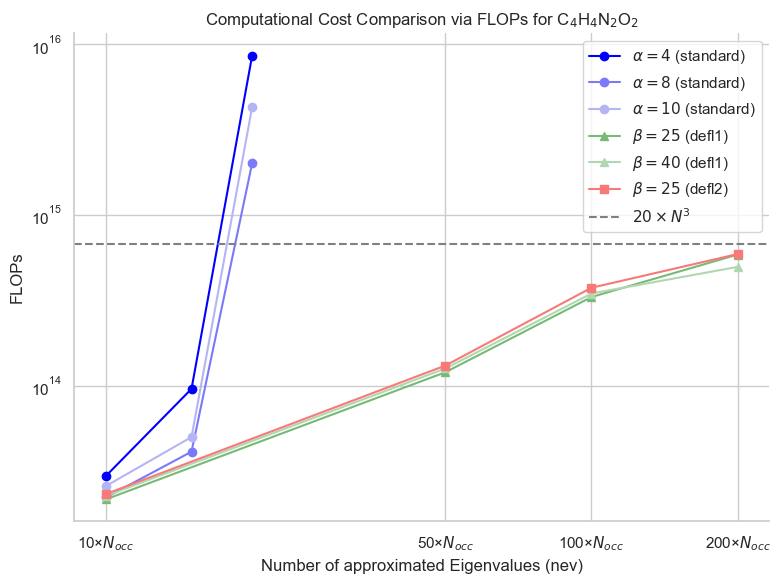

In [4]:
N_occ = 21
N_virt = 32416
N_block = np.array([10, 15, 20]) * N_occ
N = np.array([10, 50, 100, 200]) * N_occ

# Block Davidson
FLOPS_4 = np.array([29775748175040,  96207503003640, 8614283542865280])
FLOPS_8 = np.array([22282635345600, 41232042450900, 2019798514366080])
FLOPS_10 = np.array([25965835993440, 50228889949980, 4306973843598720])

# Deflation 1
FLOPS_25_def1 = np.array([21704563957828, 120351328951380, 331796334339744, 588466468666572])
FLOPS_40_def1 = np.array([22727538148004, 126629076279900, 347962601472256, 498235645111392])


# Deflation 2
FLOPS_25_def2 = np.array([23316532572932, 131675824490268, 376035933025380, 592323934760288])

Grenze = 20*(N_virt)**3

plt.figure(figsize=(8,6))
# Standard Davidson (circles)
plt.plot(N_block, FLOPS_4, label=r'$\alpha = 4$ (standard)', marker='o', color=blue_shades[0])
plt.plot(N_block, FLOPS_8, label=r'$\alpha = 8$ (standard)', marker='o', color=blue_shades[2])
plt.plot(N_block, FLOPS_10, label=r'$\alpha = 10$ (standard)', marker='o', color=blue_shades[3])
# Deflation (triangles)
plt.plot(N, FLOPS_25_def1, label=r'$\beta = 25$ (defl1)', marker='^', color=green_shades[2])
plt.plot(N, FLOPS_40_def1, label=r'$\beta = 40$ (defl1)', marker='^', color=green_shades[3])
# # Deflation until convergence (squares)
plt.plot(N, FLOPS_25_def2, label=r'$\beta = 25$ (defl2)', marker='s', color=red_shades[2])
# plt.plot(N, FLOPS_40_def2, label=r'$\beta = 40$ (defl2)', marker='s', color=red_shades[3])  
# Reference line
plt.axhline(Grenze, color='gray', linestyle='--', label=r'$20 \times N^3$')

plt.title(r'Computational Cost Comparison via FLOPs for C$_{4}$H$_{4}$N$_{2}$O$_{2}$')
plt.xscale('log')
plt.yscale('log')

xticks = np.array([10, 50, 100, 200]) * N_occ
# Create labels: one line for nev, second line for multiplier
xtick_labels = [f"{mult}×$N_{{occ}}$" for nev, mult in zip(xticks, [10, 50, 100, 200])]

# Apply xticks and labels
plt.xticks(xticks, xtick_labels)
plt.xlabel('Number of approximated Eigenvalues (nev)')
plt.ylabel('FLOPs')
plt.legend()
sns.despine()
plt.tight_layout()
plt.savefig('flops_comparison_C6H6_block.pdf')
plt.show()